In [50]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from uncertainties import ufloat
plt.style.use('ggplot')
import seaborn as sns
from astroML.plotting import scatter_contour

In [51]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/harrison.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_harrison = np.log10(central_tab.field('w80'))
log_L_OIII_harrison = central_tab.field('log_L_OIII')
outflow_size_harrison = np.array([12,10,14,16,6,10,9,8,6,14,13,6,6,11,9,7])
hdu.close()

In [52]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/sun.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_sun = np.log10(central_tab.field('w80'))
log_L_OIII_sun = central_tab.field('log_L_OIII')
hdu.close()

In [53]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/Liu.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_liu = np.log10(central_tab.field('w80'))
log_L_OIII_liu = central_tab.field('log_L_OIII')
outflow_size_liu = np.array([6.9,14.4,6.7,9.6,16.6,12.9,10.0,13.1,10.6,9.3,13.0,10.1,14.6,18.7])
hdu.close()

In [54]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/CARS.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_CARS = np.log10(central_tab.field('w80'))
log_L_OIII_CARS = central_tab.field('log_L_OIII')
log_L_Hb_blr_CARS = central_tab.field('log_Hb_lum')
hdu.close()

In [55]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/Mullaney.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_mullaney = np.log10(central_tab.field('w80'))
log_L_OIII_mullaney = central_tab.field('log_L_OIII')
log_L_Hb_blr_mullaney = central_tab.field('log_L_Hb_blr')
hdu.close()

/home/mainak/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [56]:
select = (log_L_OIII_mullaney > 38) & (log_L_OIII_mullaney < 44) & (log_w80_mullaney >0)
log_w80_mullaney_good = log_w80_mullaney[select]
log_L_OIII_mullaney_good = log_L_OIII_mullaney[select]

/home/mainak/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [57]:
from scipy.stats import gaussian_kde
x = log_L_OIII_mullaney_good
y = log_w80_mullaney_good

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

In [58]:
#select = (log_L_Hb_blr_mullaney > 30) & (log_L_Hb_blr_mullaney < 44) & (log_w80_mullaney >0)
select = (log_L_Hb_blr_mullaney > 0) & (log_w80_mullaney >0)
log_w80_mullaney_good = log_w80_mullaney[select]
log_L_Hb_blr_mullaney_good = log_L_OIII_mullaney[select]

/home/mainak/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


from scipy.stats import gaussian_kde
m = log_L_Hb_blr_mullaney_good
n = log_w80_mullaney_good

mn = np.vstack([m,n])
o = gaussian_kde(mn)(mn)

# Sort the points by density, so that the densest points are plotted last
idx = o.argsort()
m, n, o = m[idx], n[idx], o[idx]

In [60]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(21/256, 1, N)
vals[:, 1] = np.linspace(33/256, 1, N)
vals[:, 2] = np.linspace(118/256, 1, N)
vals[:, 3] = np.linspace(121/256, 1, N)

cmap2 = ListedColormap(vals)
cmap = sns.cubehelix_palette(20, light=0.15,dark=0.95, as_cmap=True)


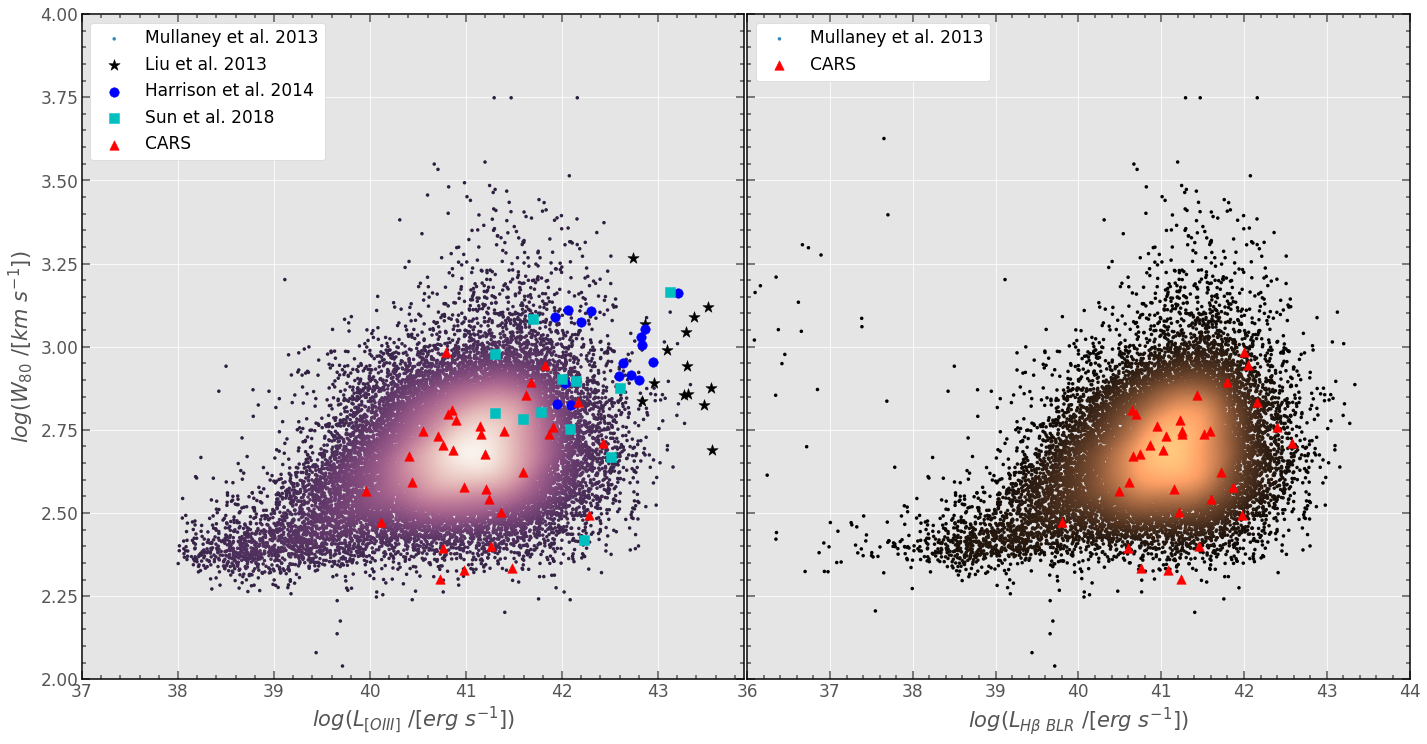

In [61]:
from matplotlib import gridspec

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
gs = gridspec.GridSpec(2,1, width_ratios=[1],height_ratios=[1,1]) 


fig = plt.figure(figsize=(20,11))
ax1 = fig.add_axes([0.06, 0.1, 0.46, 0.84]) # main axes
ax2 = fig.add_axes([0.522, 0.1, 0.46, 0.84]) # main axes

plt.setp(ax2.get_yticklabels(), visible=False)

ax1.scatter(x, y, c=z,s=50,marker='.',edgecolor='',alpha=1,cmap=cmap,label='Mullaney et al. 2013')
ax1.scatter(log_L_OIII_liu,log_w80_liu, color='k',marker='*',alpha=1, s=140,label='Liu et al. 2013')
ax1.scatter(log_L_OIII_harrison,log_w80_harrison, color='b',marker='o',alpha=1, s=90,label='Harrison et al. 2014')
ax1.scatter(log_L_OIII_sun,log_w80_sun,color='c',marker='s',alpha=1, s=90,label='Sun et al. 2018')
ax1.scatter(log_L_OIII_CARS,log_w80_CARS, color='r',marker='^',alpha=1, s=90,label='CARS')
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=17)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=17, loc='upper left')
ax1.set_ylabel('$log(W_{80}\\  /[km\ s^{-1}])$',fontsize=21)
ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
#ax.set_yscale('log',basey=10)
ax1.set_ylim(2,4)
ax1.set_xlim(37,43.9)

ax2.scatter(m, n, c=o,s=50,marker='.',edgecolor='',alpha=1,cmap='copper',label='Mullaney et al. 2013')
ax2.scatter(log_L_Hb_blr_CARS,log_w80_CARS, color='r',marker='^',alpha=1, s=90,label='CARS')
ax2.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=17)
ax2.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
ax2.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
ax2.minorticks_on()
ax2.legend(facecolor='white', framealpha=1, fontsize=17, loc='upper left')
#ax2.set_ylabel('$log(W_{80}\\  /[km\ s^{-1}])$',fontsize=21)
ax2.set_xlabel('$log(L_{H \\beta \  BLR}\  /[erg\ s^{-1}]$)',fontsize=21)
#ax.set_yscale('log',basey=10)
#ax2.set_yticks([])
ax2.set_ylim(2,4)
ax2.set_xlim(36,44)

fig.savefig('/home/mainak/Downloads/Outflow_paper1/w80--LHb-LOIII.png',overwrite=True)


In [17]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/MUSE/Big Tables/MUSE full moffat table with errors.fits')
data = hdu[1].data
compactness = data['compact']

compact_sources = data[compactness==1]
extended_sources = data[compactness==0]

compact_Hb_x = compact_sources['x0_Hb_Blr']
compact_Hb_y = compact_sources['y0_Hb_Blr']
compact_OIII_br_x = compact_sources['x0_OIII_br']
compact_OIII_br_y = compact_sources['y0_OIII_br']
compact_Hb_x_err = compact_sources['x0_Hb_Blr_err']
compact_Hb_y_err = compact_sources['y0_Hb_Blr_err']
compact_OIII_br_x_err = compact_sources['x0_OIII_br_err']
compact_OIII_br_y_err = compact_sources['y0_OIII_br_err']

extended_Hb_x = extended_sources['x0_Hb_Blr']
extended_Hb_y = extended_sources['y0_Hb_Blr']
extended_OIII_br_x = extended_sources['x0_OIII_br']
extended_OIII_br_y = extended_sources['y0_OIII_br']
extended_Hb_x_err = extended_sources['x0_Hb_Blr_err']
extended_Hb_y_err = extended_sources['y0_Hb_Blr_err']
extended_OIII_br_x_err = extended_sources['x0_OIII_br_err']
extended_OIII_br_y_err = extended_sources['y0_OIII_br_err']

D_A_compact = compact_sources['D_A']
D_A_extended = extended_sources['D_A']
D_A = data['D_A']
compact_muse_sampling_size = compact_sources['sampling_size']
extended_muse_sampling_size = extended_sources['sampling_size']


compact_off_pix = np.sqrt((compact_OIII_br_x - compact_Hb_x)**2+(compact_OIII_br_y - compact_Hb_y)**2)
compact_off_pix_err = np.sqrt(compact_Hb_x_err**2+compact_Hb_y_err**2+compact_OIII_br_x_err**2+compact_OIII_br_y_err**2)
compact_offset_wing_mainak = 4.848*D_A_compact*compact_muse_sampling_size*compact_off_pix
compact_offset_wing_mainak_err = 4.848*D_A_compact*compact_muse_sampling_size*compact_off_pix_err


extended_off_pix = np.sqrt((extended_OIII_br_x - extended_Hb_x)**2+(extended_OIII_br_y - extended_Hb_y)**2)
extended_off_pix_err = np.sqrt(extended_Hb_x_err**2+extended_Hb_y_err**2+extended_OIII_br_x_err**2+extended_OIII_br_y_err**2)
extended_offset_wing_mainak = 4.848*D_A_extended*extended_muse_sampling_size*extended_off_pix
extended_offset_wing_mainak_err = 4.848*D_A_extended*extended_muse_sampling_size*extended_off_pix_err

log_L_OIII = np.arange(39.75,44,0.25)
offset_wing_kang = 1000*(10**(0.279*log_L_OIII- 11.291))
offset_wing_karzous = 4.848*D_A
hdu.close()

In [64]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/CARS.fits')
data = hdu[1].data
compactness = data['compact']
log_L_OIII_CARS = data['log_L_OIII']
log_Hb_new = data['log_Hb_lum']
print (compactness)
compact_sources = data[compactness==1]
extended_sources = data[compactness==0]

compact_log_L_OIII_CARS = compact_sources['log_L_OIII']
extended_log_L_OIII_CARS = extended_sources['log_L_OIII']

compact_log_Hb_CARS = compact_sources['log_Hb_lum']
extended_log_Hb_CARS = extended_sources['log_Hb_lum']

hdu.close()
print(compact_offset_wing_mainak_err)
compact_offset_wing_mainak

[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
[ 5.4789143   2.7030625  20.197777    8.869246    5.445847    3.948734
  2.0162327   5.385169    4.324744    4.5344157   5.950937    7.9860506
 12.358068    1.6456476   9.866885    0.23926617  6.1323485   4.542525
  6.514717   10.193842   12.482655   36.152008  ]


array([ 63.354496 ,  90.30658  , 218.6276   ,  39.954033 ,  16.448355 ,
        17.832546 ,  13.45457  ,  43.223557 ,  14.896304 ,  36.19737  ,
        14.891949 ,  34.23334  ,  41.57358  ,  29.013279 ,  33.59348  ,
         6.3379426,  23.175741 ,  39.028076 ,  31.467928 ,  51.464725 ,
        39.98558  ,  12.887585 ], dtype=float32)

In [32]:
log_L_OIII_kang_raw = np.array([40.58,41.33,41.48,40.80,41.62,41.41,40.75,41.46,41.19,42.77,42.60,42.80,42.24,43.16,42.78,41.89,41.60,41.82,42.60,42.01,41.90,42.65,42.06])
offset_wing_kang_raw = np.array([0.60,1.23,2.26,1.62,1.39,2.30,1.16,1.74,1.92,3.85,3.62,7.45,2.36,5.34,3.57,2.51,1.20,2.46,5.16,2.97,2.91,3.01,2.52])
len(log_L_OIII_kang_raw)

23

In [33]:
log_L_OIII_karouzos_raw = np.array([40.08,41.56,40.81,40.68,41.13,40.49])
offset_wing_karouzos_raw = np.array([0.74,0.60,0.69,0.43,0.63,0.64])

In [34]:
a = (offset_wing_kang/1000)
b = np.log10(a)

a1 = ((1/11)*offset_wing_kang/1000) # 5 degrees
b1 = np.log10(a1)

a2 = ((1/1.414)*offset_wing_kang/1000) # 45 degrees
b2 = np.log10(a2)

a3 = (0.24*offset_wing_kang/1000) # 20 degrees
b3 = np.log10(a3)

a4 = ((0.866)*offset_wing_kang/1000) # 60 degrees
b4 = np.log10(a4)

c = (compact_offset_wing_mainak/1000)
d = np.log10(c)

e = (offset_wing_karzous/1000)
f = np.log10(e)

g = (extended_offset_wing_mainak/1000)
h = np.log10(g)

i = (outflow_size_harrison)
j = np.log10(i)

k = (outflow_size_liu)
l = np.log10(k)

m = offset_wing_kang_raw
n = np.log10(m)

o = offset_wing_karouzos_raw
p = np.log10(o)


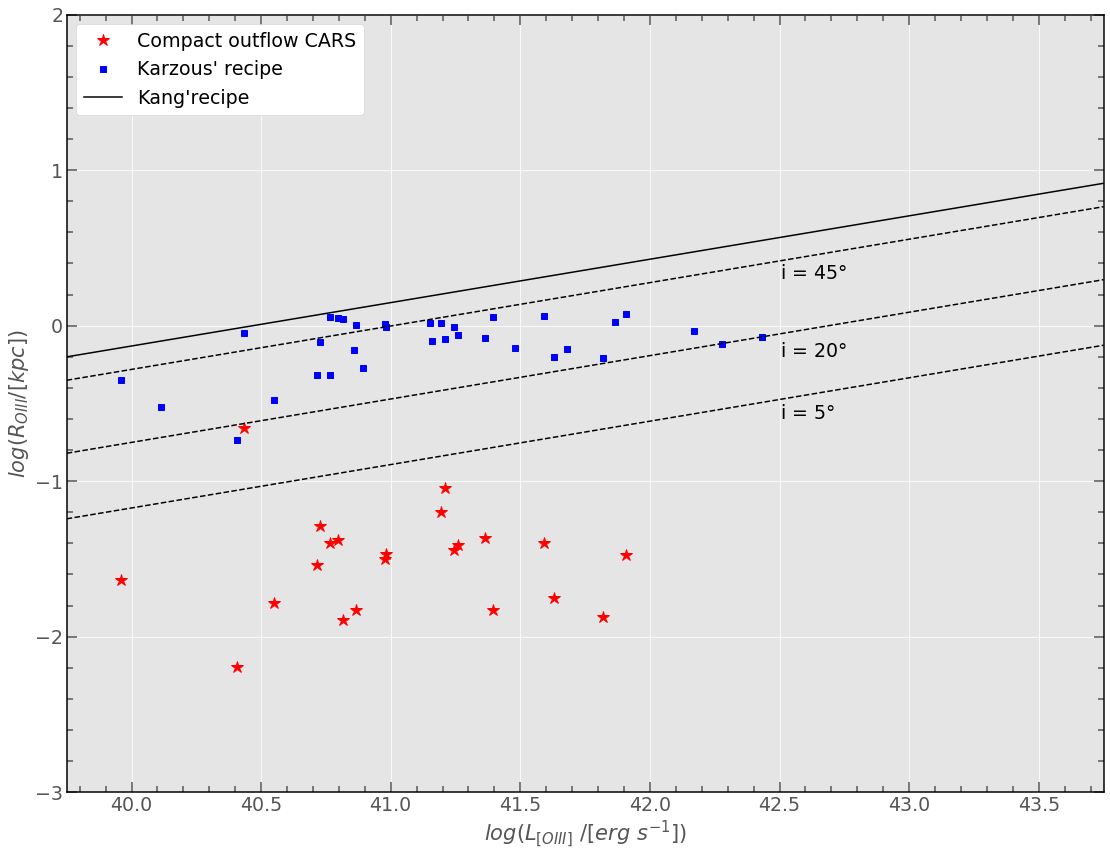

In [39]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
fig = plt.figure(figsize=(16,12)) 

ax1 = fig.add_axes([0.06, 0.07, 0.9, 0.9]) # main axes


ax1.plot(compact_log_L_OIII_CARS,d,'r*',ms=12,label='Compact outflow CARS')
#ax1.plot(log_L_OIII_liu,l,'go',label='Liu et al 2013')
#ax1.plot(log_L_OIII_harrison,j,'kD',label='Harrison et al 2014')
ax1.plot(log_L_OIII_CARS,f,'bs',label="Karzous' recipe")

ax1.plot(log_L_OIII,b,'k-',label="Kang'recipe")
ax1.plot(log_L_OIII,b1,'k--')#,label='Kang et al 2018 5 degree inclination')
ax1.plot(log_L_OIII,b2,'k--')#,label='Kang et al 2018 30 degree inclination')
ax1.plot(log_L_OIII,b3,'k--')#,label='Kang et al 2018 45 degree inclination')
ax1.annotate(r'i = $45\degree$',xy=(42.5,0.26),xytext=(42.5,0.3),fontsize=19)
ax1.annotate(r'i = $20\degree$',xy=(42.5,-0.26),xytext=(42.5,-0.2),fontsize=19)
ax1.annotate(r'i = $5\degree$',xy=(42.5,-0.66),xytext=(42.5,-0.6),fontsize=19)

ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel(r'$log(R_{OIII}/[kpc])$', fontsize=21)

ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper left')

ax1.set_ylim(-3,2)
ax1.set_xlim(39.75,43.75)

fig.savefig('/home/mainak/Downloads/Outflow_paper1/outflow_size.png',overwrite=True)

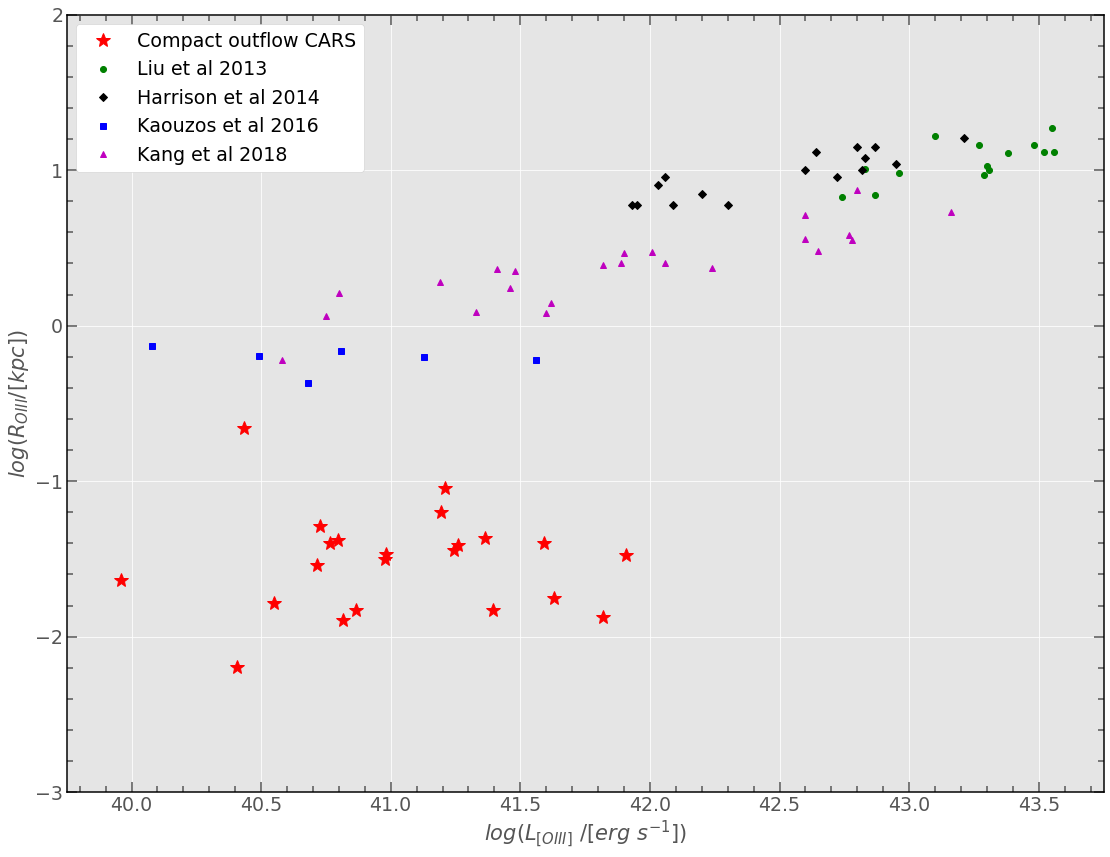

In [41]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
fig = plt.figure(figsize=(16,12)) 

ax1 = fig.add_axes([0.06, 0.07, 0.9, 0.9]) # main axes


ax1.plot(compact_log_L_OIII_CARS,d,'r*',ms=15,label='Compact outflow CARS')
ax1.plot(log_L_OIII_liu,l,'go',label='Liu et al 2013')
ax1.plot(log_L_OIII_harrison,j,'kD',label='Harrison et al 2014')
#ax1.plot(log_L_OIII_CARS,f,'bs',label='Karzous et al 2016')
ax1.plot(log_L_OIII_karouzos_raw,p,'bs',label='Kaouzos et al 2016')
ax1.plot(log_L_OIII_kang_raw,n,'m^',label='Kang et al 2018')

#ax1.plot(log_L_OIII,b,'k-',label='Kang et al 2018')
#ax1.plot(log_L_OIII,b1,'k--')#,label='Kang et al 2018 5 degree inclination')
#ax1.plot(log_L_OIII,b2,'k--')#,label='Kang et al 2018 30 degree inclination')
#ax1.plot(log_L_OIII,b3,'k--')#,label='Kang et al 2018 45 degree inclination')
#ax1.annotate(r'i = $45\degree$',xy=(42.5,0.26),xytext=(42.5,0.3),fontsize=19)
#ax1.annotate(r'i = $20\degree$',xy=(42.5,-0.26),xytext=(42.5,-0.2),fontsize=19)
#ax1.annotate(r'i = $5\degree$',xy=(42.5,-0.66),xytext=(42.5,-0.6),fontsize=19)

ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel(r'$log(R_{OIII}/[kpc])$', fontsize=21)

ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper left')

ax1.set_ylim(-3,2)
ax1.set_xlim(39.75,43.75)

fig.savefig('/home/mainak/Downloads/Outflow_paper1/outflow_size_comaprison.png',overwrite=True)

In [ ]:
agn_type = data['AGN_TYPE']

In [13]:
type_2 = data[agn_type==2]
type_1 = data[agn_type==1]

In [14]:
core_vel_type1 = type_1['OIII_5007_VEL']
core_vel_type1_err = type_1['OIII_5007_VEL_ERR']
wing_vel_type1 = type_1['OIII_5007B_VEL']
wing_vel_type1_err = type_1['OIII_5007B_VEL_ERR']
vel_offset_type1 = wing_vel_type1 - core_vel_type1
vel_offset_err_type1 = np.sqrt(wing_vel_type1_err**2 + core_vel_type1_err**2)

In [15]:
np.mean(vel_offset_type1)

-118.23775

In [2]:
n_e_compact = np.array([1881,2311,4989,2730])
n_e_compact_err = np.array([651,1859,1913,1012])
n_e_extended = np.array([497,775,407])
n_e_extended_err = np.array([290,52,97])
n_e = np.append(n_e_compact,n_e_extended)
n_e_err = np.append(n_e_compact_err,n_e_extended_err)

n_e_compact_avg = np.mean(n_e_compact)
n_e_compact_err_avg = np.sqrt(np.mean(n_e_compact_err**2))
n_e_extended_avg = np.mean(n_e_extended)
n_e_extended_err_avg = np.sqrt(np.mean(n_e_extended_err**2))

n_e = [n_e_compact_avg,n_e_extended_avg]
n_e_err = [n_e_compact_err_avg,n_e_extended_err_avg]
labels = [r'Compact outflows', r'Extended outflows']
x_pos = np.arange(len(labels))

In [3]:
r_compact = np.array([90,40,18,15])
r_compact_err = np.array([3,9,4,4])
r_extended = np.array([193,422,202])
r_extended_err = np.array([19.3,42.2,20.2])
r = np.append(r_compact,r_extended)
r_err = np.append(r_compact_err,r_extended_err)

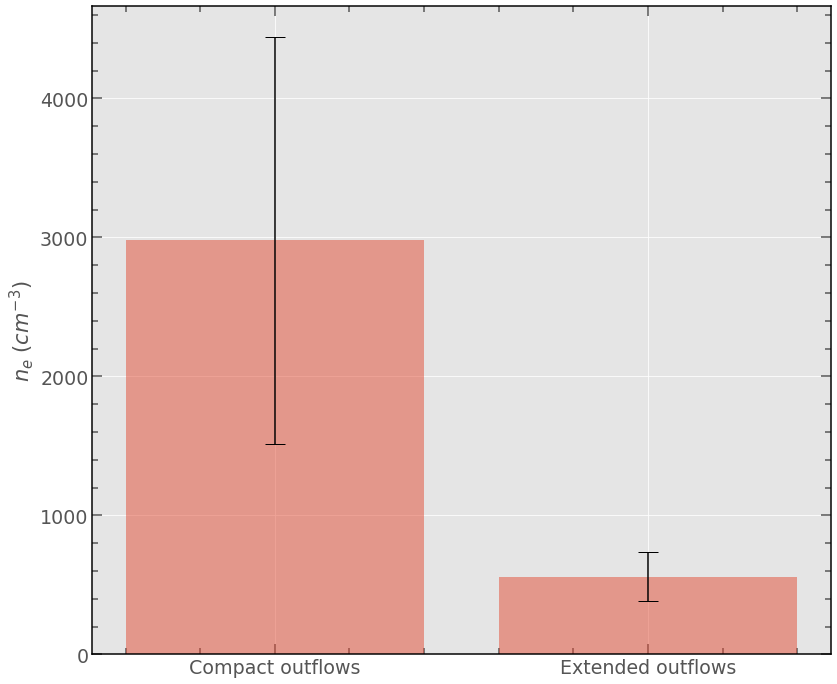

In [6]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(12,10)) 

ax1 = fig.add_axes([0.105, 0.07, 0.855, 0.9]) # main axes
ax1.bar(x_pos,n_e,yerr=n_e_err,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
#ax1.fill_between(r, n_e - n_e_err, n_e + n_e_err,color='gray', alpha=0.2),
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels)
ax1.set_ylabel(r'$n_{e}$ $(cm^{-3})$', fontsize=21)
#ax1.set_xlim(100,10000)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
#ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper right')
fig.savefig('/home/mainak/Downloads/Outflow_paper1/electron_density_bar_plot.png',overwrite=True)

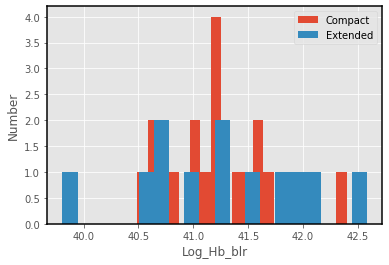

In [73]:
plt.hist(compact_log_Hb_CARS,bins=20,label='Compact')
plt.hist(extended_log_Hb_CARS,bins=20,label='Extended')
plt.xlabel('Log_Hb_blr')
plt.ylabel('Number')
plt.legend()

In [76]:
np.mean (compact_log_Hb_CARS)

41.279915

In [77]:
np.mean (extended_log_Hb_CARS)

41.27228